In [13]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import requests
import json
from scipy import stats

In [3]:
#import datafiles
oly_df = pd.read_csv("Resources/guardian_summer_olympics.csv")
allath_df = pd.read_csv("Resources/kaggle_allathlete_olympics.csv")
allath_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
#Get a list of all countries participating in 2012 Olympics + total medals won per country
df_2012 = allath_df.loc[allath_df["Year"]==2012]
countries_group = df_2012.groupby(["NOC"])
medals_list_df = pd.DataFrame(countries_group["Medal"].count())
medals_2012_df = medals_list_df.reset_index()
medals_2012_df.head()

,NOC,Medal
0,AFG,1
1,ALB,0
2,ALG,1
3,AND,0
4,ANG,0


In [5]:
#Set up World Bank API to pull population + per capita GDP per country for analysis
url = "http://api.worldbank.org/v2/countries/GBR/indicators/NY.GDP.PCAP.CD?format=json"
countries_response = requests.get(url).json()
print(json.dumps(countries_response, indent = 4, sort_keys=True))

[
    {
        "lastupdated": "2018-09-21",
        "page": 1,
        "pages": 2,
        "per_page": 50,
        "total": 58
    },
    [
        {
            "country": {
                "id": "GB",
                "value": "United Kingdom"
            },
            "countryiso3code": "GBR",
            "date": "2017",
            "decimal": 1,
            "indicator": {
                "id": "NY.GDP.PCAP.CD",
                "value": "GDP per capita (current US$)"
            },
            "obs_status": "",
            "unit": "",
            "value": 39720.4434267836
        },
        {
            "country": {
                "id": "GB",
                "value": "United Kingdom"
            },
            "countryiso3code": "GBR",
            "date": "2016",
            "decimal": 1,
            "indicator": {
                "id": "NY.GDP.PCAP.CD",
                "value": "GDP per capita (current US$)"
            },
            "obs_status": "",
            "unit": "",
  

In [20]:
#could not figure out how to effectively pull data from World Bank's json dump (too many indcies with same name)
#decided to download World Bank CSV file of per capita GDP and work from there
worldbank_gdp = pd.read_csv("Resources/Worldbank_GDPpercap.csv")
gdp2012_df = worldbank_gdp[["Country Code", "2012"]]
gdp2012_df_final= gdp2012_df.rename(columns={"Country Code" : "NOC", "2012" : "GDP per Capita, 2012"})
gdp2012_df_final = gdp2012_df_final.loc[gdp2012_df_final["GDP per Capita, 2012"] > 0]
gdp2012_df_final.head()

,NOC,"GDP per Capita, 2012"
1,AFG,669.009051
2,AGO,4539.467689
3,ALB,4247.614308
4,AND,38391.080870
5,ARB,7463.399723


In [21]:
#also wanted to get population per country in 2012. downloaded another world bank datafile for this
worldbank_pop = pd.read_csv("Resources/Worldbank_population.csv")
pop2012_df = worldbank_pop[["Country Code", "2012"]]
pop2012_df_final= pop2012_df.rename(columns={"Country Code":"NOC", "2012": "Population in 2012"})
pop2012_df_final.head()

,NOC,Population in 2012
0,ABW,102577.0
1,AFG,30696958.0
2,AGO,25096150.0
3,ALB,2900401.0
4,AND,82431.0


In [22]:
#merge all dataframes (countries, gdp, pop) to get dataframe for analysis
merge1 = pd.merge(medals_2012_df, gdp2012_df_final, on="NOC", how="inner")
merge2 = pd.merge(merge1, pop2012_df_final, on="NOC", how="inner")

#exclude countries who have hod less than 5 medal wins
analysis_df = merge2.loc[merge2["Medal"] >= 5]

slope = 0.0007729784004581387
p-value = 0.030207419487391557


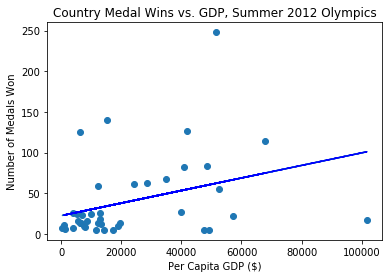

In [23]:
#graph of GDP per capita vs. Medal wins
x_gdp = analysis_df["GDP per Capita, 2012"]
y_medals = analysis_df["Medal"]

plt.scatter(x_gdp, y_medals)
plt.xlabel("Per Capita GDP ($)")
plt.ylabel("Number of Medals Won")
plt.title("Country Medal Wins vs. GDP, Summer 2012 Olympics")



(slope, intercept, _, _, _) = stats.linregress(x_gdp, y_medals)
fit = slope * x_gdp + intercept
plt.plot(x_gdp, fit)
plt.plot(x_gdp, fit, 'b--')
slope, intercept, r_value, p_value, std_err = stats.linregress(x_gdp, y_medals)

print(f"slope = {slope}")
print(f"p-value = {p_value}")

slope = 0.00046700489078327904
p-value = 0.3098971294408652


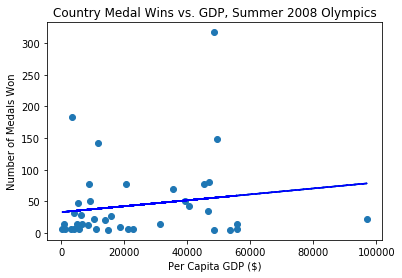

In [24]:
#make the same graph for Summer 2008 Olympics
df_2008 = allath_df.loc[allath_df["Year"]==2008]
countries_group = df_2008.groupby(["NOC"])
medals_list_df = pd.DataFrame(countries_group["Medal"].count())
medals_2008_df = medals_list_df.reset_index()
gdp2008_df = worldbank_gdp[["Country Code", "2008"]]
gdp2008_df_final= gdp2008_df.rename(columns={"Country Code" : "NOC", "2008" : "GDP per Capita, 2008"})
pop2008_df = worldbank_pop[["Country Code", "2008"]]
pop2008_df_final= pop2008_df.rename(columns={"Country Code":"NOC", "2008": "Population in 2008"})
gdp2008_df_final = gdp2008_df_final.loc[gdp2008_df_final["GDP per Capita, 2008"] > 0]

#merge all dataframes (countries, gdp, pop) to get dataframe for analysis
merge1 = pd.merge(medals_2008_df, gdp2008_df_final, on="NOC", how="inner")
merge2 = pd.merge(merge1, pop2008_df_final, on="NOC", how="inner")

#exclude countries who have hod 0 medal wins
analysis_df = merge2.loc[merge2["Medal"] >= 5]

#graph of GDP per capita vs. Medal wins
x_gdp = analysis_df["GDP per Capita, 2008"]
y_medals = analysis_df["Medal"]

plt.scatter(x_gdp, y_medals)
plt.xlabel("Per Capita GDP ($)")
plt.ylabel("Number of Medals Won")
plt.title("Country Medal Wins vs. GDP, Summer 2008 Olympics")

(slope, intercept, _, _, _) = stats.linregress(x_gdp, y_medals)
fit = slope * x_gdp + intercept
plt.plot(x_gdp, fit)
plt.plot(x_gdp, fit, 'b--')
slope, intercept, r_value, p_value, std_err = stats.linregress(x_gdp, y_medals)

print(f"slope = {slope}")
print(f"p-value = {p_value}")